In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

from perceptron import Perceptron

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 12,8
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

In [4]:
ds1_train = pd.read_csv("train1.csv",header = None)
ds1_test = pd.read_csv("dev1.csv", header=None)
ds1_train.insert(0,"theta",pd.Series(np.ones(len(ds1_train))))
ds1_test.insert(0,"theta",pd.Series(np.ones(len(ds1_test))))
cv, test = train_test_split(ds1_test, test_size = 0.3, random_state = 0)

In [5]:
fil1 = ds1_train[2] == 0. 
fil2 = ds1_train[2] == 1.
ds0_1 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 0. 
fil2 = ds1_train[2] == 2.
ds0_2 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 0. 
fil2 = ds1_train[2] == 3.
ds0_3 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 1. 
fil2 = ds1_train[2] == 2.
ds1_2 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 1. 
fil2 = ds1_train[2] == 3.
ds1_3 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 2. 
fil2 = ds1_train[2] == 3.
ds2_3 = ds1_train.where(fil1 | fil2).dropna()

fil1 = cv[2] == 0. 
fil2 = cv[2] == 1.
cv0_1 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 0. 
fil2 = cv[2] == 2.
cv0_2 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 0. 
fil2 = cv[2] == 3.
cv0_3 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 1. 
fil2 = cv[2] == 2.
cv1_2 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 1. 
fil2 = cv[2] == 3.
cv1_3 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 2. 
fil2 = cv[2] == 3.
cv2_3 = cv.where(fil1 | fil2).dropna()

fil1 = test[2] == 0. 
fil2 = test[2] == 1.
test0_1 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 0. 
fil2 = test[2] == 2.
test0_2 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 0. 
fil2 = test[2] == 3.
test0_3 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 1. 
fil2 = test[2] == 2.
test1_2 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 1. 
fil2 = test[2] == 3.
test1_3 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 2. 
fil2 = test[2] == 3.
test2_3 = test.where(fil1 | fil2).dropna()

In [6]:
ds0_1[2] = ds0_1[2].replace([0.,1],[-1,1])
ds0_2[2] = ds0_2[2].replace([0.,2],[-1,1])
ds0_3[2] = ds0_3[2].replace([0.,3],[-1,1])
ds1_2[2] = ds1_2[2].replace([1,2],[-1,1])
ds1_3[2] = ds1_3[2].replace([1,3],[-1,1])
ds2_3[2] = ds2_3[2].replace([2,3],[-1,1])


cv0_1[2] = cv0_1[2].replace([0.,1],[-1,1])
cv0_2[2] = cv0_2[2].replace([0.,2],[-1,1])
cv0_3[2] = cv0_3[2].replace([0.,3],[-1,1])
cv1_2[2] = cv1_2[2].replace([1,2],[-1,1])
cv1_3[2] = cv1_3[2].replace([1,3],[-1,1])
cv2_3[2] = cv2_3[2].replace([2,3],[-1,1])

test0_1[2] = test0_1[2].replace([0.,1],[-1,1])
test0_2[2] = test0_2[2].replace([0.,2],[-1,1])
test0_3[2] = test0_3[2].replace([0.,3],[-1,1])
test1_2[2] = test1_2[2].replace([1,2],[-1,1])
test1_3[2] = test1_3[2].replace([1,3],[-1,1])
test2_3[2] = test2_3[2].replace([2,3],[-1,1])

In [7]:
def hyperparameter_testing(train_dat, cv_dat):
    eta_range = [0.001,0.005,0.01,0.05,0.1,1,5,10,100]
    acc_train = []
    acc_cv = []
    for eta in eta_range:
        model = Perceptron(train_dat,learning_rate = eta)
        model.train()
        acc_train.append(model.accuracy(train_dat))
        acc_cv.append(model.accuracy(cv_dat))
    dictionary = {"Hyperparameter": eta_range, "Training Accuracy":acc_train,"CV Accuracy":acc_cv}
    df = pd.DataFrame(dictionary)
    max_val = np.argmax(np.array(acc_cv))
    print("Maximum accuracy on CV is achieved for the learning rate value: " , eta_range[max_val])
    return(df)

In [12]:
tab_01 = hyperparameter_testing(ds0_1,cv0_1)
tab_01.to_csv("acc_02.csv)

Maximum accuracy on CV is achieved for the learning rate value:  0.001


,Hyperparameter,Training Accuracy,CV Accuracy
0,0.001,1.0,1.0
1,0.005,1.0,1.0
2,0.010,1.0,1.0
3,0.050,1.0,1.0
4,0.100,1.0,1.0
5,1.000,1.0,1.0
6,5.000,1.0,1.0
7,10.000,1.0,1.0
8,100.000,1.0,1.0


In [8]:
nn0_1 = Perceptron(ds0_1,learning_rate = 0.01)
nn0_1.train()
print(nn0_1.accuracy(test0_1))

1.0


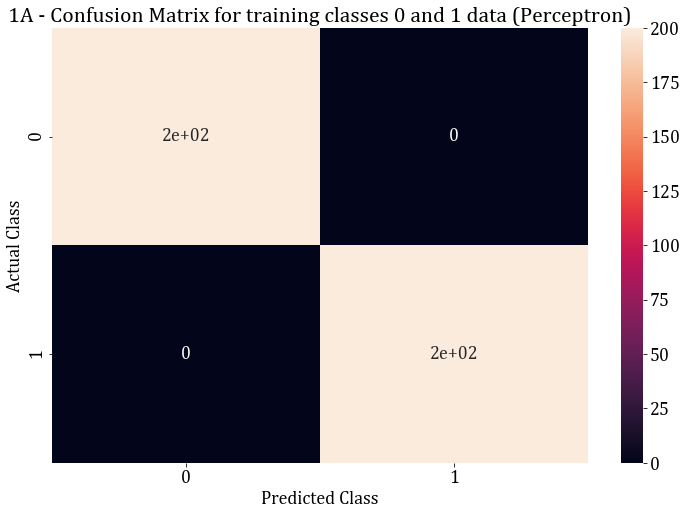

In [23]:
nn0_1.confusionMatrix(ds0_1, name = "training classes 0 and 1",save_fig = True)

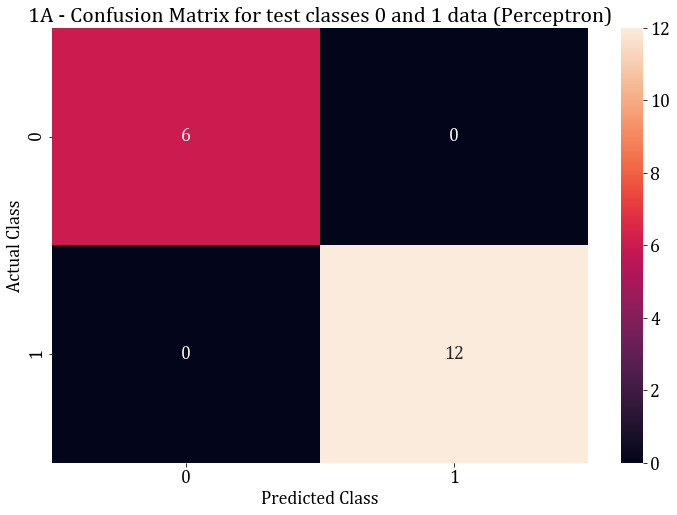

In [24]:
nn0_1.confusionMatrix(test0_1, name = "test classes 0 and 1",save_fig = True)

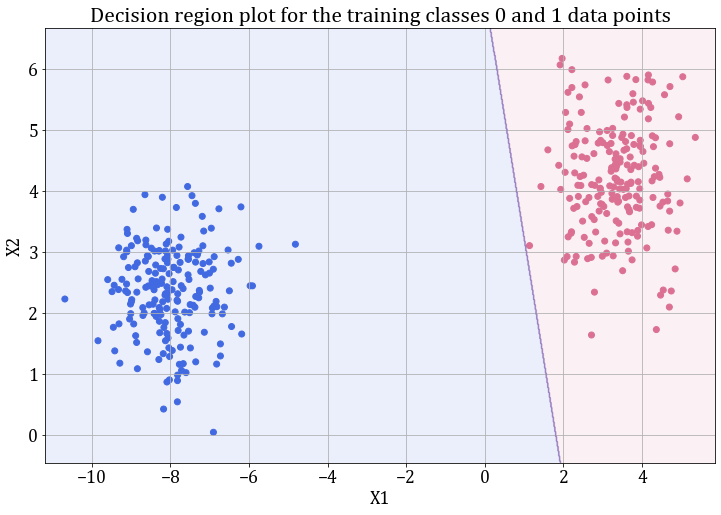

In [25]:
nn0_1.plot_decision_region(name = "training classes 0 and 1",savefig = True)

In [155]:
tab_02 = hyperparameter_testing(ds0_2,cv0_2)
tab_02.to_csv("acc_02.csv")
tab_02

Maximum accuracy on CV is achieved for the learning rate value:  0.001


,Hyperparameter,Training Accuracy,CV Accuracy
0,0.001,1.0,1.0
1,0.005,1.0,1.0
2,0.010,1.0,1.0
3,0.050,1.0,1.0
4,0.100,1.0,1.0
5,1.000,1.0,1.0
6,5.000,1.0,1.0
7,10.000,1.0,1.0
8,100.000,1.0,1.0


1.0


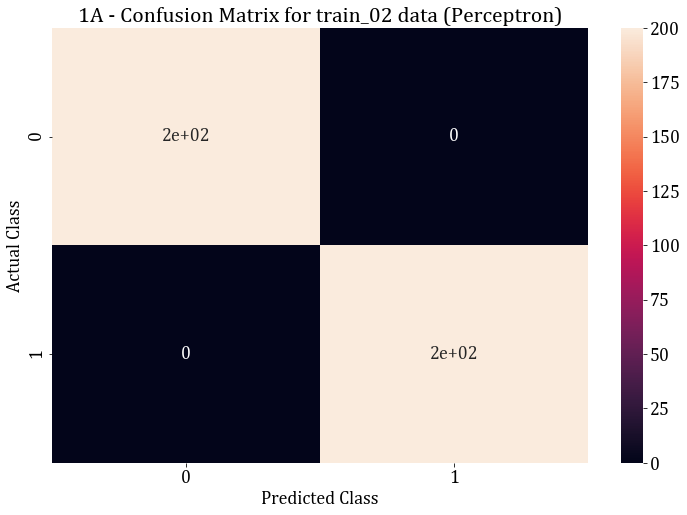

In [20]:
nn0_2 = Perceptron(ds0_2)
nn0_2.train()
print(nn0_2.accuracy(test0_2))

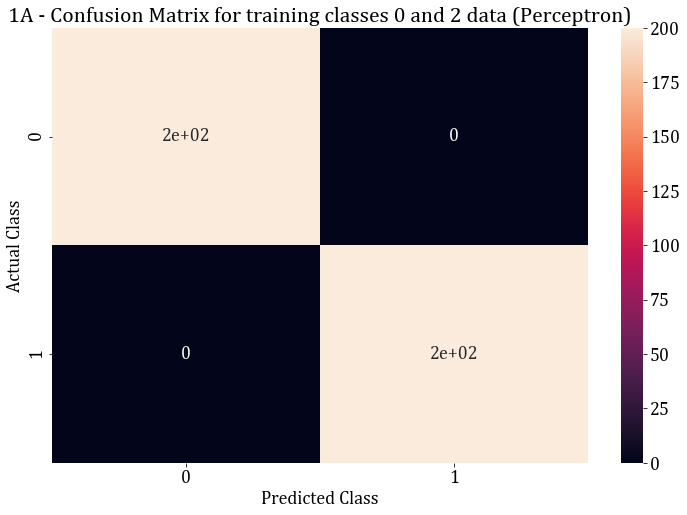

In [26]:
nn0_2.confusionMatrix(ds0_2, name = "training classes 0 and 2",save_fig=True)

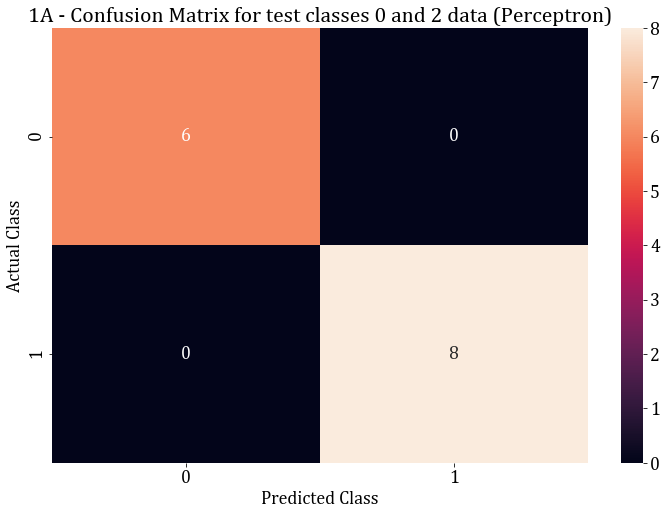

In [27]:
nn0_2.confusionMatrix(test0_2, name = "test classes 0 and 2",save_fig=True)

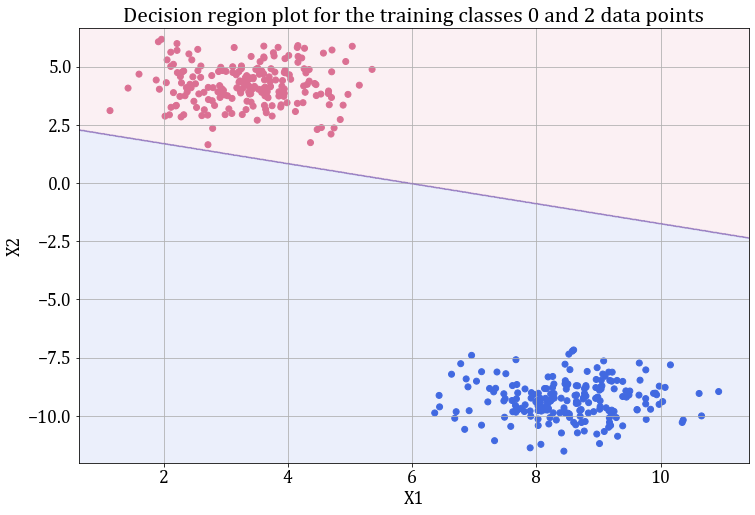

In [28]:
nn0_2.plot_decision_region(name = "training classes 0 and 2",savefig = True)

In [11]:
tab_03 = hyperparameter_testing(ds0_3,cv0_3)
tab_03.to_csv("acc_03.csv")
tab_03

Maximum accuracy on CV is achieved for the learning rate value:  0.001


,Hyperparameter,Training Accuracy,CV Accuracy
0,0.001,1.0,1.0
1,0.005,1.0,1.0
2,0.010,1.0,1.0
3,0.050,1.0,1.0
4,0.100,1.0,1.0
5,1.000,1.0,1.0
6,5.000,1.0,1.0
7,10.000,1.0,1.0
8,100.000,1.0,1.0


In [35]:
print(nn0_3.accuracy(test0_3))

1.0


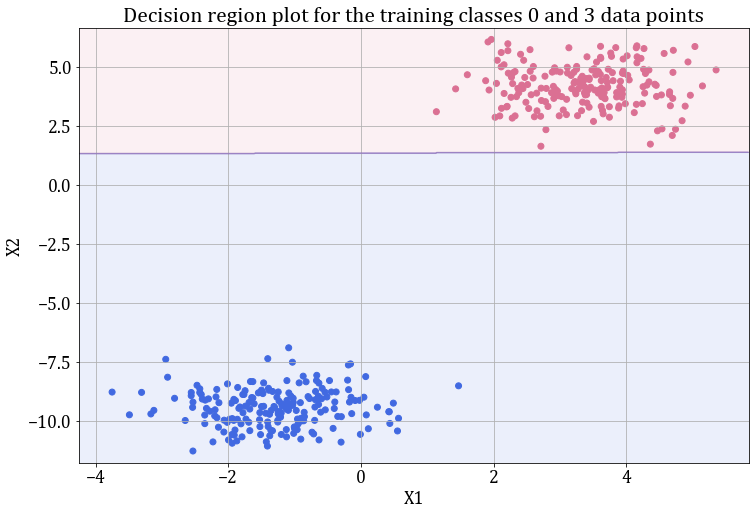

In [29]:
nn0_3 = Perceptron(ds0_3)
nn0_3.train()
nn0_3.plot_decision_region(name = "training classes 0 and 3",savefig = True)

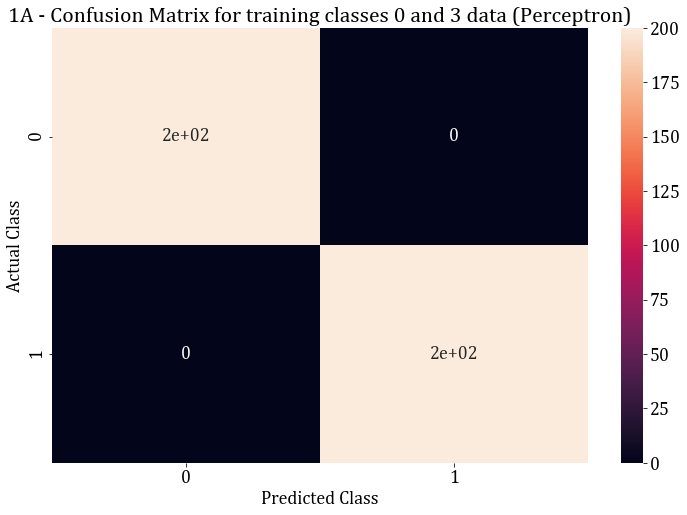

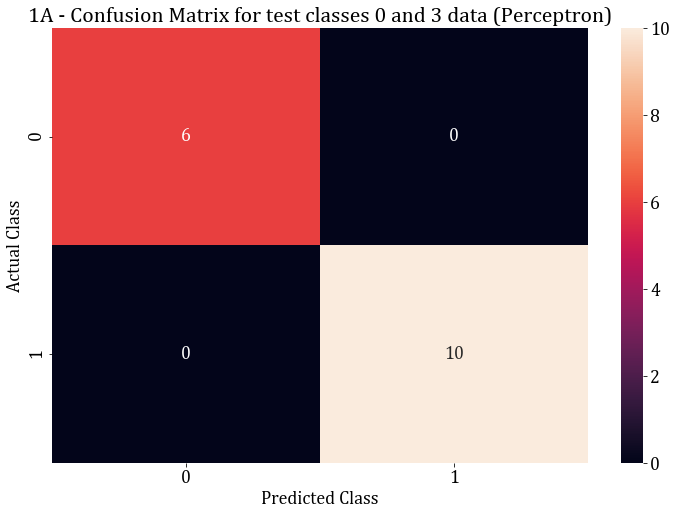

In [30]:
nn0_3.confusionMatrix(ds0_3, name = "training classes 0 and 3",save_fig=True)
nn0_3.confusionMatrix(test0_3, name = "test classes 0 and 3",save_fig=True)

In [12]:
tab_13 = hyperparameter_testing(ds1_3,cv1_3)
tab_13.to_csv("acc_13_perc.csv")
tab_13

Maximum accuracy on CV is achieved for the learning rate value:  0.001


,Hyperparameter,Training Accuracy,CV Accuracy
0,0.001,1.0,1.0
1,0.005,1.0,1.0
2,0.010,1.0,1.0
3,0.050,1.0,1.0
4,0.100,1.0,1.0
5,1.000,1.0,1.0
6,5.000,1.0,1.0
7,10.000,1.0,1.0
8,100.000,1.0,1.0


In [36]:
print(nn1_3.accuracy(test1_3))

1.0


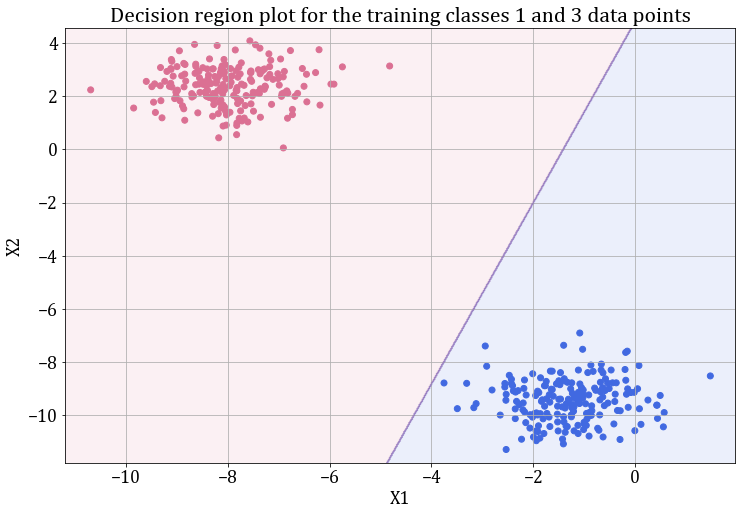

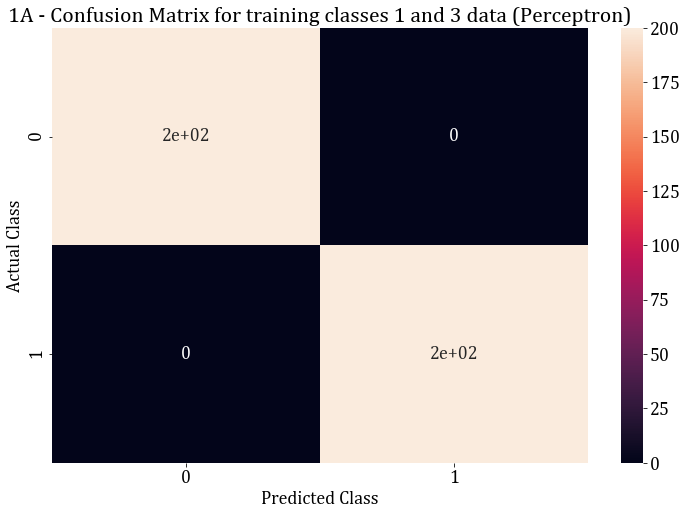

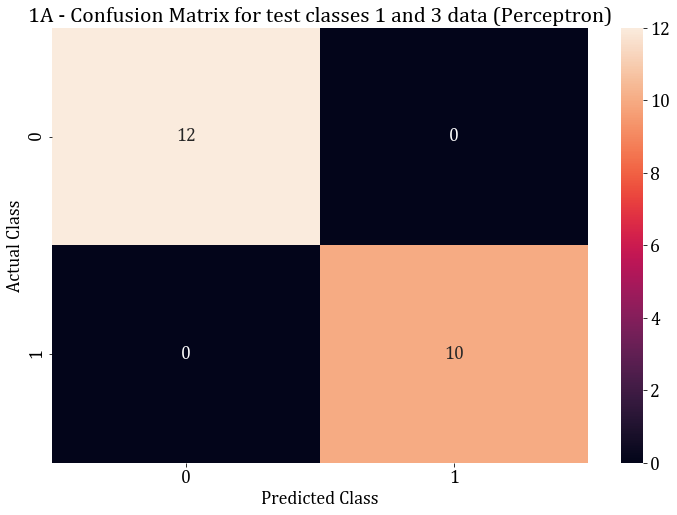

In [31]:
nn1_3 = Perceptron(ds1_3)
nn1_3.train()
nn1_3.plot_decision_region(name = "training classes 1 and 3",savefig = True)
nn1_3.confusionMatrix(ds1_3, name = "training classes 1 and 3",save_fig=True)
nn1_3.confusionMatrix(test1_3, name = "test classes 1 and 3",save_fig=True)

In [13]:
tab_23 = hyperparameter_testing(ds2_3,cv2_3)
tab_23.to_csv("acc_23_perc.csv")
tab_23

Maximum accuracy on CV is achieved for the learning rate value:  0.005


,Hyperparameter,Training Accuracy,CV Accuracy
0,0.001,1.0,0.928571
1,0.005,1.0,1.000000
2,0.010,1.0,1.000000
3,0.050,1.0,1.000000
4,0.100,1.0,1.000000
5,1.000,1.0,1.000000
6,5.000,1.0,0.976190
7,10.000,1.0,1.000000
8,100.000,1.0,1.000000


In [37]:
print(nn2_3.accuracy(test2_3))

1.0


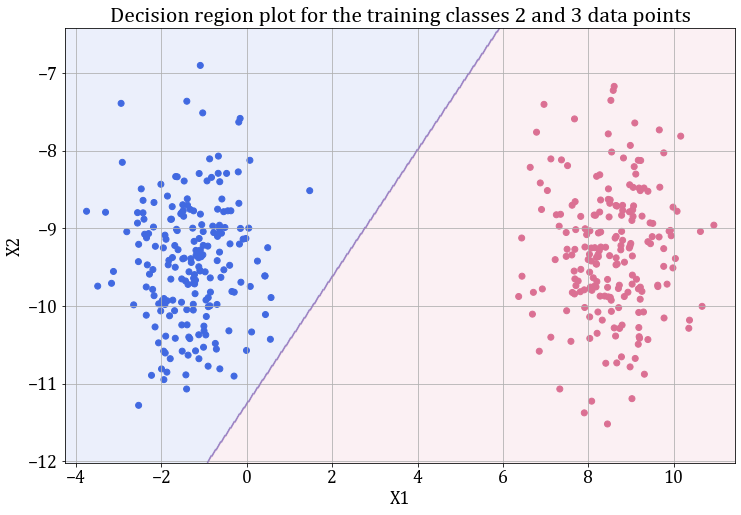

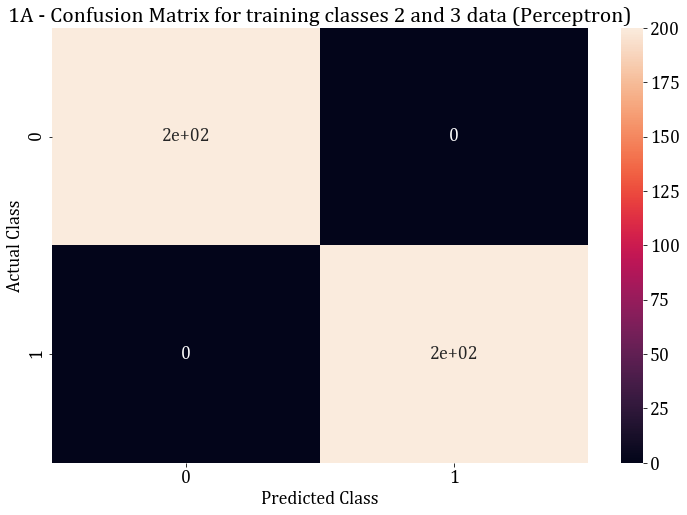

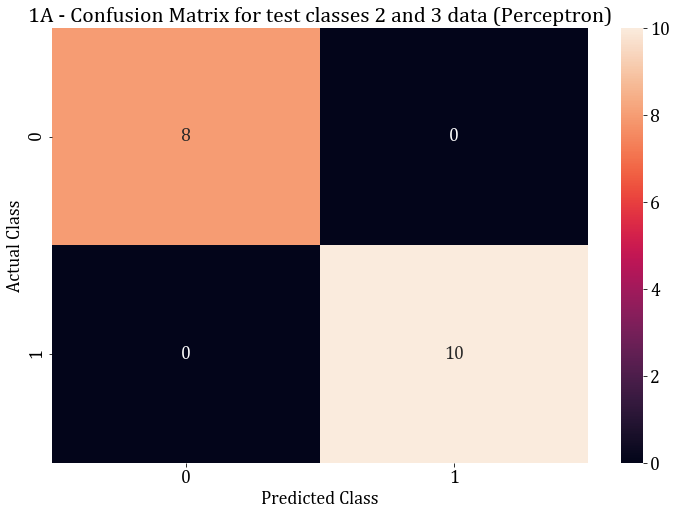

In [32]:
nn2_3 = Perceptron(ds2_3)
nn2_3.train()
nn2_3.plot_decision_region(name = "training classes 2 and 3",savefig = True)
nn2_3.confusionMatrix(ds2_3, name = "training classes 2 and 3",save_fig=True)
nn2_3.confusionMatrix(test2_3, name = "test classes 2 and 3",save_fig=True)

In [14]:
tab_12 = hyperparameter_testing(ds1_2,cv1_2)
tab_12.to_csv("acc_12_perc.csv")
tab_12

Maximum accuracy on CV is achieved for the learning rate value:  0.05


,Hyperparameter,Training Accuracy,CV Accuracy
0,0.001,1.0,0.975
1,0.005,1.0,0.975
2,0.010,1.0,0.975
3,0.050,1.0,1.000
4,0.100,1.0,1.000
5,1.000,1.0,1.000
6,5.000,1.0,1.000
7,10.000,1.0,1.000
8,100.000,1.0,1.000


In [38]:
print(nn1_2.accuracy(test1_2))

1.0


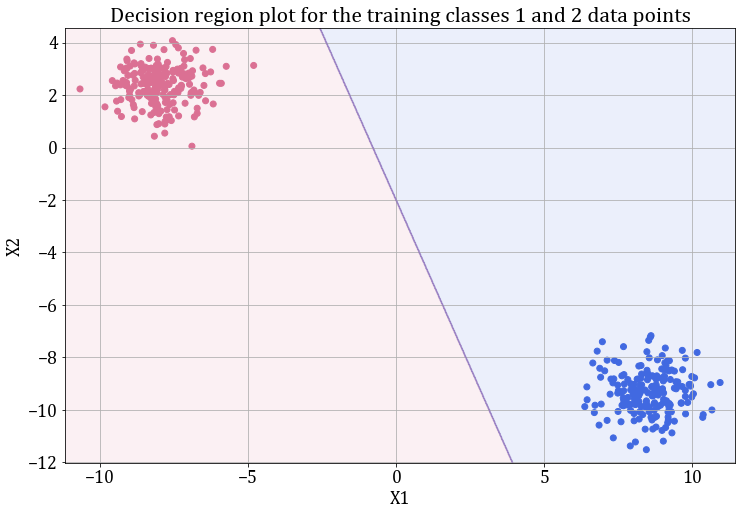

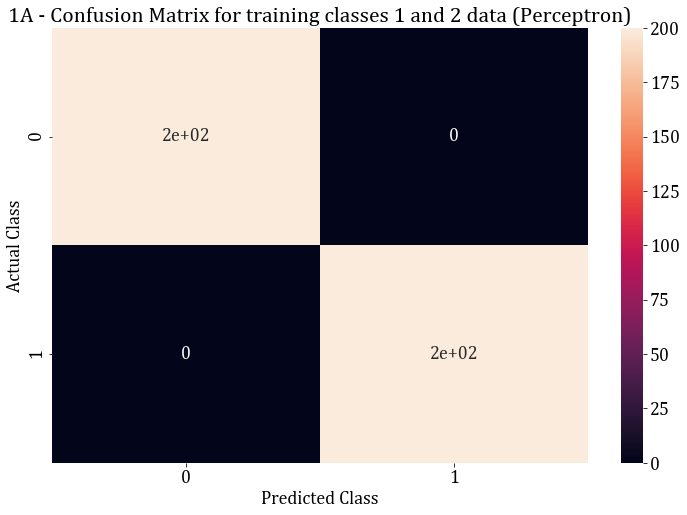

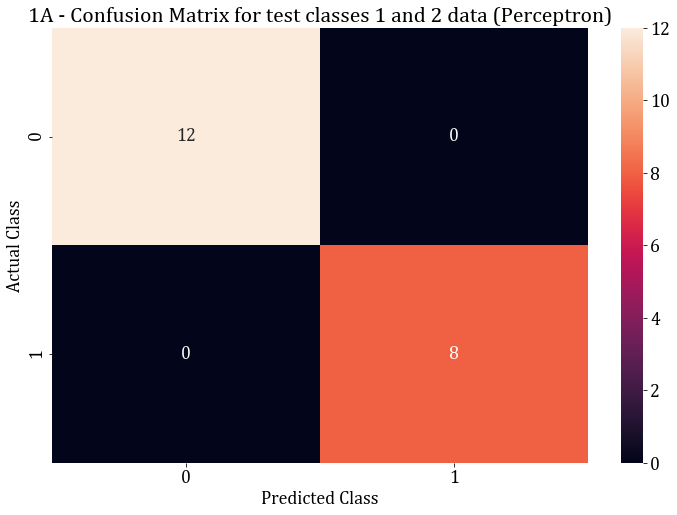

In [33]:
nn1_2 = Perceptron(ds1_2,learning_rate = 0.05)
nn1_2.train()
nn1_2.plot_decision_region(name = "training classes 1 and 2",savefig = True)
nn1_2.confusionMatrix(ds1_2, name = "training classes 1 and 2",save_fig=True)
nn1_2.confusionMatrix(test1_2, name = "test classes 1 and 2",save_fig=True)